# MLP para classificar MNIST
Este experimento tem a finalidade de exemplificar o reconhecimento de dígitos manuscritos utilizando o algorítimo de MLP da biblioteca Scikit Learn.
Para maiores detalhes, acesse os links abaixo:
- <a href="https://scikit-learn.org">Scikit Learn</a>
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlp#sklearn.neural_network.MLPClassifier">MLP Classificador (Sklearn)</a>


## Passo 1

Preparando os dados para passar para o MLP

### Baixando os dados

Baixa aqui as imagens que representam os dígitos manuscritos, os dados são o dataset <a href="https://www.openml.org/d/554">MNIST</a>.

No site de datasets ele é encontrado pelo nome mnist_784.

O Dataset é setado na variável mnist, que pode ser acessada como um dicionário convencional do Python.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', data_home='./data/mnist')

### O Formato dos dados

As imágesm são acessadas pela propriedade "data" da variável.

Ela tem uma lista de 70.000 imagens em escala de sinza, no tamanho 28x28 pixels.

Entretanto as imagens da lista estão "transformadas" em forma de vetor (1D) em não matrix (2D).

In [10]:
mnist.data.shape

(70000, 784)

### Visualizando as imagens

Para que possamos ver algumas as imagens, devemos voltar cada imagem ao seu formato de 28 x 28 pixels.

In [11]:
import math
import numpy as np

imgOrSp = mnist.data[0].shape
imgNewSp = math.sqrt(imgOrSp[0])

imgs = np.array(mnist.data).reshape(-1, int(imgNewSp), int(imgNewSp))

In [15]:
def PlotImages(_imgs, _tags, _nsamples, _tagLabel, 
                _tags2 = [], _tagLabel2 = ''):
    import matplotlib.pyplot as plt

    _, axes = plt.subplots((_nsamples // 4), 4, figsize=(10, 3.5*(_nsamples // 4)))

    images_and_labels = list(zip(_imgs[:_nsamples], _tags[:_nsamples]))
    for ixAx in range(_nsamples):
        (image, label) = images_and_labels[ixAx]

        ax = axes[ixAx // 4 , ixAx % 4]
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        title = f'{_tagLabel}: {label}'
        if (len(_tags2) > 0):
            title += f'\n{_tagLabel2}: {_tags2[ixAx]}'
        ax.set_title(title)

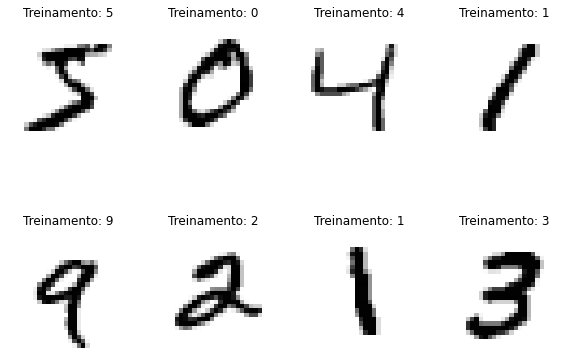

In [16]:
PlotImages(imgs, mnist.target, 8, 'Treinamento')

### Tratando os dados para o MLP
Os algorítimos de ML são muito sensíveis aos dados que são usados. E neste experimento, vamos tomar alguns cuidados:
- No caso das RNs, o volume de dados afeta em o tempo de treinamento da rede. Aqui então, vamos redimencionar as imagens para que as mesmas sejam comprimidas para um formato de 8 x 8 pixels, isso ajuda a melhorar o tempo de treinamento.
- O mesmo ponto acima, também ajuda a melhorar a acertividade do algorítimo, pois o número de váriáveis controladas internamente pela rede vai ser menor.

#### 1. Redimencionando imagens

Aqui, para executar o redimencionamento vamos fazer uso de um framework para tratamento de imagens muito usado em Python, chamado Scikit Image. 

Para maiores referencias basta acessar o <a href="">link</a>.

In [17]:
from skimage.transform import resize

imgToML = []
for img in imgs:
    imgToML.append(resize(img, (8, 8), anti_aliasing=False))

imgToML = np.array(imgToML)

In [18]:
# Olhando o tamanho da imagem
imgToML.shape

(70000, 8, 8)

Visualizando as primeiras 8 imagens depois do redimencionamento.

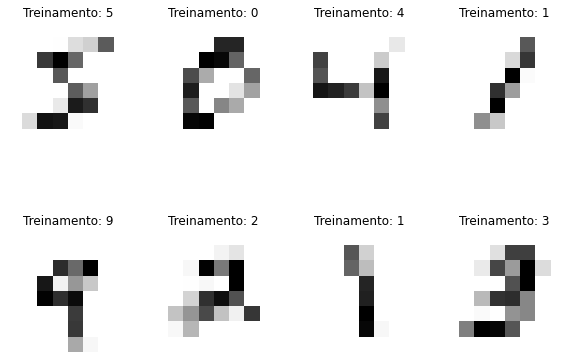

In [19]:
PlotImages(imgToML, mnist.target, 8, 'Treinamento')

#### 2. Transformando as imagens em um vetor de valores numéricos

Para que as imagens sejam passadas para o MLP, elas devem ser transformadass novamente em um vetor de valores numéricos, com 8 x 8 posições. Isso porque o MLP, assim como grand emaioria dos algorítimos de ML, entendem somente valores numéricos.


In [20]:
imgToML = imgToML.reshape(imgToML.shape[0], 8*8)

In [21]:
imgToML.shape

(70000, 64)

#### 3. Normaliza os dados 

Aqui novamente transformamos os dados para ajudar o MLP a treinar mais rapido e a melhor a acertividade. Fazemos aqui o maior valor dos pixels ser 1. Como aqui temos imagens, e o maior valor para um píxel é 255, basta dividirmos o valor do pixel por 255.

In [23]:
imgToML = imgToML / 255

#### 4. Separando os dados entre treinamento e teste

Para completar esta tarefa, vamos usar um método do próprio sklearn que separa os dados para que se possa 
a. Criar o modelo 
b. Validar o modelo criado

Existem algums vários métodos que fazem este papel, a exemplo o "train_test_split". 

Uma atenção especial deve ser data ao resultado final, pois nao podemos correr riscos de separar dados para treinar ou testar que pertencem mais a uma classe do que a outra. OU seja, os dados devem se separados de forma igual entre as classes, e o método train_test_split faz isso.

In [25]:
# Import datasets, classifiers and performance metrics
from sklearn.model_selection import train_test_split

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    imgToML, mnist.target, test_size=0.3, shuffle=False)

## Passo 2

Aqui vamos criar o modelo, executar o treinamento

### 1. Criando o modelo

Aqui vamos criar o MLP e fazendo uso do framework scikit-learn para isso. 

Vale comentar alguns parametros do MLP,
- hidden_layer_sizes: Aqui podemos definir o número de nós e camadas que a nossa rede vai ter;
- max_inter: Aqui definimos o número máximo de interaçoes que o algotítimo vai executar;
- verbose: Se vai ou não gerar um status de execução a medida que o próprio algorítimo roda;

Vale lembrar que é possível configurar muitos outros parâmetros, bsta dar uma conferida na documentação do próprio <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">sklearn</a>.

In [26]:
from sklearn.neural_network import MLPClassifier

# Create a classifier: a support vector classifier
classifier = MLPClassifier(hidden_layer_sizes=(64,), random_state=1, max_iter=300, verbose=True)

### 2. Treinando o modelo

Aqui vamos chamar a função <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.fit">fit</a> que realiza o treinamento do modelo criado na etapa anterior.

In [27]:
%%time

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

Iteration 1, loss = 1.33416829
Iteration 2, loss = 0.62724374
Iteration 3, loss = 0.53032287
Iteration 4, loss = 0.48770788
Iteration 5, loss = 0.45850834
Iteration 6, loss = 0.43407450
Iteration 7, loss = 0.41288164
Iteration 8, loss = 0.39406624
Iteration 9, loss = 0.37669336
Iteration 10, loss = 0.36225261
Iteration 11, loss = 0.34843873
Iteration 12, loss = 0.33673306
Iteration 13, loss = 0.32572551
Iteration 14, loss = 0.31558830
Iteration 15, loss = 0.30665480
Iteration 16, loss = 0.29919608
Iteration 17, loss = 0.29173285
Iteration 18, loss = 0.28515188
Iteration 19, loss = 0.27928637
Iteration 20, loss = 0.27402383
Iteration 21, loss = 0.26850262
Iteration 22, loss = 0.26356792
Iteration 23, loss = 0.26027818
Iteration 24, loss = 0.25544119
Iteration 25, loss = 0.25197095
Iteration 26, loss = 0.24847532
Iteration 27, loss = 0.24459871
Iteration 28, loss = 0.24183949
Iteration 29, loss = 0.23873822
Iteration 30, loss = 0.23628150
Iteration 31, loss = 0.23357133
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64,), max_iter=300, random_state=1,
              verbose=True)

## Passo 3

Aqui vamos executar a predição do sdados separados para teste, e analisar os resultados gerados

### 1. Predizendo os valores separados para teste

Aqui é um passo muito importante, a "predição" de valores separados do treinamento. Neste mmento é que começamos a verificar o quanto o modelo criado é bom ou ruim para classificar os dados.

In [34]:
%%time

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

CPU times: user 63.2 ms, sys: 0 ns, total: 63.2 ms
Wall time: 68.1 ms


### 2. Analisando os resultados

Fazendo o uso de funções do pŕoprio sklearn vamos, com os dados classificados pelo modelo e as classificações reais dos mesmos vamos mensurar a qualidade do modelo através de métricas.

Usaremos aqui:
- a matriz de confusão: uma matriz onde em suas linhas é exibida a classe real dos valores e em colunas o valor que o algorítimo classificou (valor predito). Para paiores detalhes vija o <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix">link</a> e a sua definição conceitual <a href="https://en.wikipedia.org/wiki/Confusion_matrix">aqui</a>. Vale destacar que as demias metricas usadas aqui são extraidas da matriz de confusão.
- a presision: Vide definição conceitual da matriz de confusão.
- a recall: Vide definição conceitual da matriz de confusão.
- a f1-score: Vide definição conceitual da matriz de confusão.

. 

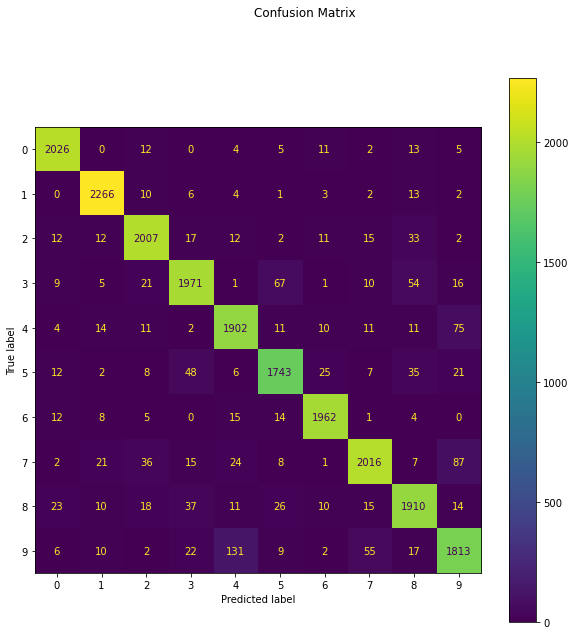

In [35]:
from sklearn import metrics
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10,10))

disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, ax=ax)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

In [36]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier MLPClassifier(hidden_layer_sizes=(64,), max_iter=300, random_state=1,
              verbose=True):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2078
           1       0.97      0.98      0.97      2307
           2       0.94      0.95      0.94      2123
           3       0.93      0.91      0.92      2155
           4       0.90      0.93      0.91      2051
           5       0.92      0.91      0.92      1907
           6       0.96      0.97      0.97      2021
           7       0.94      0.91      0.93      2217
           8       0.91      0.92      0.92      2074
           9       0.89      0.88      0.88      2067

    accuracy                           0.93     21000
   macro avg       0.93      0.93      0.93     21000
weighted avg       0.93      0.93      0.93     21000




#### Analisa visual dos resultados

Aqui, vamos olhar os 8 primeiros valores preditos, e conferir como o algotírimo rodou

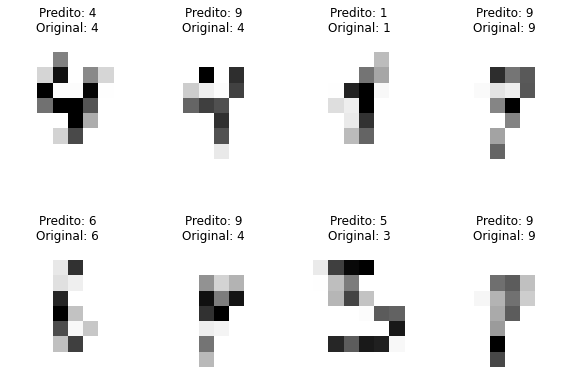

In [37]:
PlotImages(X_test.reshape(-1, 8, 8), predicted, 8, 'Predito', y_test, 'Original')